In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import numpy as np
import folium

In [2]:
pip install shapely scipy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


# Data PreProcessing - Defining target variable(Severity score)

In [10]:
file_path ="C:/Users/reddy/Desktop/606/Project/Crime.csv"
df = pd.read_csv(file_path)
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,3/1/2020 0:00,3/1/2020 0:00,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,2/9/2020 0:00,2/8/2020 0:00,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 0:00,11/4/2020 0:00,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,5/10/2023 0:00,3/10/2020 0:00,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,8/18/2022 0:00,8/17/2020 0:00,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892929,241604405,1/14/2024 0:00,1/13/2024 0:00,720,16,Foothill,1673,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,8700 LANKERSHIM BL,NaN,34.2271,-118.3878
892930,241604246,1/8/2024 0:00,1/8/2024 0:00,800,16,Foothill,1601,2,625,OTHER ASSAULT,...,IC,Invest Cont,625.0,NaN,NaN,NaN,VAUGHN ST,DE GARMO AV,34.2865,-118.4161
892931,242004546,1/16/2024 0:00,1/16/2024 0:00,1510,20,Olympic,2013,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,HOBART BL,3RD ST,34.0690,-118.3054
892932,240705409,2/2/2024 0:00,1/31/2024 0:00,30,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,2300 S SYCAMORE AV,NaN,34.0360,-118.3527


In [11]:
columns_to_drop = ['DR_NO', 'Rpt Dist No', 'Mocodes', 'Vict Descent', 'Status','Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Cross Street']

df_1 = df.drop(columns=columns_to_drop)

df_1.dropna(subset=['Premis Cd', 'Premis Desc'], inplace=True)


In [12]:
crime_categories = {
    'Violent Crimes': ['HOMICIDE', 'ROBBERY', 'KIDNAPPING', 'ASSAULT WITH DEADLY WEAPON', 'BATTERY - SIMPLE ASSAULT', 'AGGRAVATED ASSAULT', 'INTIMATE PARTNER', 'CRIMINAL THREATS', 'BRANDISH WEAPON', 'SEXUAL PENETRATION', 'CHILD ABUSE', 'DISCHARGE FIREARMS', 'SHOTS FIRED', 'RAPE', 'CRIMINAL HOMICIDE', 'ORAL COPULATION', 'LEWD CONDUCT', 'SODOMY', 'RAPE, ATTEMPTED', 'CHILD STEALING', 'KIDNAPPING - GRAND ATTEMPT', 'BATTERY WITH SEXUAL CONTACT', 'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER', 'SEXUAL ASSAULT', 'BEASTIALITY', 'LYNCHING', 'LYNCHING - ATTEMPTED', 'RESISTING ARREST', 'BATTERY POLICE (SIMPLE)'],
    'Property Crimes': ['BURGLARY', 'VEHICLE - STOLEN', 'THEFT', 'ARSON', 'VANDALISM', 'BURGLARY FROM VEHICLE', 'THEFT FROM MOTOR VEHICLE', 'SHOPLIFTING', 'BUNCO', 'EMBEZZLEMENT', 'FORGERY', 'EXTORTION', 'COUNTERFEIT', 'GRAND THEFT', 'TILL TAP', 'THEFT, COIN MACHINE', 'PICKPOCKET', 'DEFRAUDING INNKEEPER', 'BUNCO, ATTEMPT', 'BIKE - STOLEN','BIKE - ATTEMPTED STOLEN', 'VEHICLE - ATTEMPT STOLEN', 'VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)', 'BOAT - STOLEN', 'TELEPHONE PROPERTY - DAMAGE'],
    'Drug/Alcohol Related': ['DRUNK ROLL', 'DRUGS, TO A MINOR'],
    'Sex Crimes': ['SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ', 'INDECENT EXPOSURE', 'PEEPING TOM', 'CHILD PORNOGRAPHY', 'CHILD MOLEST', 'SEX OFFENDER REGISTRANT OUT OF COMPLIANCE','LEWD/LASCIVIOUS ACTS WITH CHILD', 'STALKING'],
    'Theft/Fraud': ['PURSE SNATCHING', 'PURSE SNATCHING - ATTEMPT', 'THEFT OF IDENTITY', 'CREDIT CARDS, FRAUD USE', 'UNAUTHORIZED COMPUTER ACCESS', 'DOCUMENT FORGERY', 'DOCUMENT WORTHLESS', 'CONTEMPT OF COURT', 'VIOLATION OF COURT ORDER', 'VIOLATION OF RESTRAINING ORDER', 'VIOLATION OF TEMPORARY RESTRAINING ORDER', 'FAILURE TO YIELD', 'FAILURE TO DISPERSE', 'FALSE POLICE REPORT', 'FALSE IMPRISONMENT', 'ILLEGAL DUMPING', 'TRAIN WRECKING'],
    'Traffic Violations': ['FAILURE TO YIELD', 'RECKLESS DRIVING', 'DRIVING WITHOUT OWNER CONSENT (DWOC)'],
    'Weapons Violation': ['BRANDISH WEAPON', 'WEAPONS POSSESSION'],
    'Non-Violent Miscellaneous': ['TRESPASSING', 'DISORDERLY CONDUCT', 'DISTURBING THE PEACE', 'OTHER MISCELLANEOUS CRIME', 'CONSPIRACY', 'INCITING A RIOT', 'CHILD ABANDONMENT', 'BIGAMY', 'BRIBERY', 'CONTRIBUTING', 'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD', 'THREATENING PHONE CALLS/LETTERS', 'PROWLER', 'INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)', 'FIREARMS RESTRAINING ORDER (FIREARMS RO)', 'DISRUPT SCHOOL', 'REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)', 'BLOCKING DOOR INDUCTION CENTER', 'FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)', 'OTHER ASSAULT'],
    'Domestic Violence': ['INTIMATE PARTNER - SIMPLE ASSAULT', 'INTIMATE PARTNER - AGGRAVATED ASSAULT', 'VIOLATION OF RESTRAINING ORDER', 'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)', 'CHILD NEGLECT', 'CHILD ANNOYING', 'CHILD ABUSE', 'DOMESTIC VIOLENCE'],
    'Serious Violations': ['ASSAULT ON POLICE OFFICER', 'KIDNAPPING', 'THROWING OBJECT AT MOVING VEHICLE', 'BOMB SCARE', 'HUMAN TRAFFICKING', 'KIDNAPPING - GRAND ATTEMPT', 'PANDERING', 'PIMPING', 'CRUELTY TO ANIMALS', 'HOMICIDE','MANSLAUGHTER, NEGLIGENT' , 'BATTERY ON A FIREFIGHTER']
}

default_category = 'Other'

severity_scores = {
    'Violent Crimes': 10,
    'Property Crimes': 7,
    'Drug/Alcohol Related': 5,
    'Sex Crimes': 9,
    'Theft/Fraud': 6,
    'Traffic Violations': 4,
    'Weapons Violation': 8,
    'Non-Violent Miscellaneous': 3,
    'Domestic Violence': 7,
    'Serious Violations': 9
}

def categorize_crime_description(crime_desc):
    for category, keywords in crime_categories.items():
        if any(keyword in crime_desc.upper() for keyword in keywords):
            return category
    return default_category

df_1['Crime Description'] = df_1['Crm Cd Desc'].apply(categorize_crime_description)

df_1['Severity_Crime'] = df_1['Crime Description'].map(severity_scores)

df_1.head()

,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Part 1-2,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status Desc,LOCATION,LAT,LON,Crime Description,Severity_Crime
0,3/1/2020 0:00,3/1/2020 0:00,2130,7,Wilshire,1,510,VEHICLE - STOLEN,0,M,101.0,STREET,NaN,NaN,Adult Arrest,1900 S LONGWOOD AV,34.0375,-118.3506,Property Crimes,7
1,2/9/2020 0:00,2/8/2020 0:00,1800,1,Central,1,330,BURGLARY FROM VEHICLE,47,M,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,Invest Cont,1000 S FLOWER ST,34.0444,-118.2628,Property Crimes,7
2,11/11/2020 0:00,11/4/2020 0:00,1700,3,Southwest,1,480,BIKE - STOLEN,19,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,Invest Cont,1400 W 37TH ST,34.0210,-118.3002,Property Crimes,7
3,5/10/2023 0:00,3/10/2020 0:00,2037,9,Van Nuys,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,405.0,CLOTHING STORE,NaN,NaN,Invest Cont,14000 RIVERSIDE DR,34.1576,-118.4387,Property Crimes,7
4,8/18/2022 0:00,8/17/2020 0:00,1200,6,Hollywood,2,354,THEFT OF IDENTITY,28,M,102.0,SIDEWALK,NaN,NaN,Invest Cont,1900 TRANSIENT,34.0944,-118.3277,Property Crimes,7


In [13]:

weapon_categories = {
    'Firearms': ['HAND GUN', 'SEMI-AUTOMATIC PISTOL', 'UNKNOWN FIREARM', 'REVOLVER', 'RIFLE', 'SHOTGUN', 'AUTOMATIC WEAPON', 'SUB-MACHINE GUN', 'ASSAULT WEAPON', 'HECKLER & KOCH', 'UZI SEMIAUTOMATIC ASSAULT RIFLE', 'MAC-11 SEMIAUTOMATIC ASSAULT WEAPON', 'MAC-10 SEMIAUTOMATIC ASSAULT WEAPON', 'M1-1 SEMIAUTOMATIC ASSAULT RIFLE', 'M-14 SEMIAUTOMATIC ASSAULT RIFLE'],
    'Knives/Bladed Objects': ['KNIFE', 'BLADE', 'MACHETE', 'SWITCH BLADE', 'DIRK/DAGGER', 'BOWIE KNIFE', 'ICE PICK', 'RAZOR BLADE', 'RAZOR', 'STRAIGHT RAZOR'],
    'Blunt Objects': ['CLUB/BAT', 'BLUNT INSTRUMENT', 'HAMMER', 'TIRE IRON', 'BRASS KNUCKLES', 'BLACKJACK'],
    'Personal Weapons/Physical Force': ['STRONG-ARM', 'PHYSICAL PRESENCE'],
    'Explosives/Flammable Objects': ['EXPLOXIVE DEVICE', 'FIRE', 'BOMB THREAT'],
    'Chemical/Nontraditional Weapons': ['MACE/PEPPER SPRAY', 'CAUSTIC CHEMICAL/POISON', 'SCALDING LIQUID'],
    'Threats': ['VERBAL THREAT', 'DEMAND NOTE'],
    'Miscellaneous Objects': ['ROCK/THROWN OBJECT', 'PIPE/METAL PIPE', 'BOTTLE', 'STICK', 'FOLDING KNIFE', 'KITCHEN KNIFE', 'AIR PISTOL/REVOLVER/RIFLE/BB GUN', 'OTHER CUTTING INSTRUMENT', 'UNKNOWN TYPE CUTTING INSTRUMENT', 'SCREWDRIVER', 'CONCRETE BLOCK/BRICK', 'BELT FLAILING INSTRUMENT/CHAIN', 'SCISSORS', 'FIXED OBJECT', 'GLASS', 'AXE', 'BOARD', 'TOY GUN', 'VEHICLE', 'ROPE/LIGATURE', 'STARTER PISTOL/REVOLVER', 'CLEAVER', 'SAWED OFF RIFLE/SHOTGUN', 'BOW AND ARROW', 'SYRINGE', 'MARTIAL ARTS WEAPONS', 'RELIC FIREARM', 'ANTIQUE FIREARM'],
    'Simulated/Toy Weapons': ['SIMULATED GUN', 'TOY GUN'],
    'Unknown Weapons': ['UNKNOWN WEAPON/OTHER WEAPON']
}

weapon_severity_scores = {
    'Firearms': 10,
    'Knives/Bladed Objects': 8,
    'Blunt Objects': 6,
    'Personal Weapons/Physical Force': 4,
    'Explosives/Flammable Objects': 9,
    'Chemical/Nontraditional Weapons': 5,
    'Threats': 3,
    'Miscellaneous Objects': 2,
    'Simulated/Toy Weapons': 1,
    'Unknown Weapons': 2, 
    'Unknown or Miscellaneous' : 2
}

def categorize_weapon_description(weapon_desc):
    if pd.isna(weapon_desc):
        return 'No Weapon'
    for category, keywords in weapon_categories.items():
        if any(keyword in weapon_desc.upper() for keyword in keywords):
            return category
    return 'Unknown Weapons'

df_1['Weapon Description'] = df_1['Weapon Desc'].apply(categorize_weapon_description)

df_1['Severity_Weapon'] = df_1['Weapon Description'].map(weapon_severity_scores)

df_1.loc[df_1['Weapon Desc'].isna(), 'Severity_Weapon'] = 0

df_1.head()


,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Part 1-2,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,...,Weapon Used Cd,Weapon Desc,Status Desc,LOCATION,LAT,LON,Crime Description,Severity_Crime,Weapon Description,Severity_Weapon
0,3/1/2020 0:00,3/1/2020 0:00,2130,7,Wilshire,1,510,VEHICLE - STOLEN,0,M,...,NaN,NaN,Adult Arrest,1900 S LONGWOOD AV,34.0375,-118.3506,Property Crimes,7,No Weapon,0.0
1,2/9/2020 0:00,2/8/2020 0:00,1800,1,Central,1,330,BURGLARY FROM VEHICLE,47,M,...,NaN,NaN,Invest Cont,1000 S FLOWER ST,34.0444,-118.2628,Property Crimes,7,No Weapon,0.0
2,11/11/2020 0:00,11/4/2020 0:00,1700,3,Southwest,1,480,BIKE - STOLEN,19,X,...,NaN,NaN,Invest Cont,1400 W 37TH ST,34.0210,-118.3002,Property Crimes,7,No Weapon,0.0
3,5/10/2023 0:00,3/10/2020 0:00,2037,9,Van Nuys,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,...,NaN,NaN,Invest Cont,14000 RIVERSIDE DR,34.1576,-118.4387,Property Crimes,7,No Weapon,0.0
4,8/18/2022 0:00,8/17/2020 0:00,1200,6,Hollywood,2,354,THEFT OF IDENTITY,28,M,...,NaN,NaN,Invest Cont,1900 TRANSIENT,34.0944,-118.3277,Property Crimes,7,No Weapon,0.0


In [14]:


premise_categories = {
    'Residential': [
        'SINGLE FAMILY DWELLING', 'MULTI-UNIT DWELLING', 'APARTMENT', 'DUPLEX', 'CONDOMINIUM/TOWNHOUSE', 
        'MOBILE HOME', 'TRAILERS', 'RV\'S', 'MOTORHOME', 'GARAGE/CARPORT', 'DRIVEWAY', 'PORCH', 'YARD', 
        'RESIDENTIAL', 'SINGLE RESIDENCE OCCUPANCY (SRO\'S) LOCATIONS', 'TRANSITIONAL HOUSING/HALFWAY HOUSE', 
        'MOBILE HOME/TRAILERS/CONSTRUCTION TRAILERS/RV\'S/MOTORHOME', 'PORCH, RESIDENTIAL', 'GROUP HOME', 
        'ABANDONED BUILDING ABANDONED HOUSE', 'OTHER RESIDENCE'
    ],
    'Business/Commercial': [
        'OTHER BUSINESS', 'RESTAURANT/FAST FOOD', 'DEPARTMENT STORE', 'MARKET', 'CYBERSPACE', 'CLOTHING STORE', 
        'OTHER STORE', 'DRUG STORE', 'MINI-MART', 'BANK', 'LAUNDROMAT', 'DISCOUNT STORE', 'MEMBERSHIP STORE (COSTCO,SAMS CLUB)*', 
        'AUTO REPAIR SHOP', 'THE BEVERLY CENTER', 'THE BEVERLY CONNECTION', 'WEBSITE', 
        'AUTO DEALERSHIP (CHEVY, FORD, BMW, MERCEDES, ETC.)', 'BEAUTY/BARBER SHOP', 'LIQUOR STORE', 'CELL PHONE STORE', 
        'NIGHT CLUB', 'BAR/COCKTAIL/NIGHTCLUB', 'COFFEE SHOP', 'SHOPPING MALL', 'CONSTRUCTION SITE', 'WAREHOUSE', 
        'FACTORY', 'AUTO SALES LOT', 'GUN/SPORTING GOODS', 'ELECTRONICS STORE', 'JEWELRY STORE', 'PAWN SHOP', 
        'RECYCLING CENTER', 'SWAP MEET', 'THEATRE/MOVIE', 'ENTERTAINMENT/COMEDY CLUB', 'BEAUTY SUPPLY STORE', 
        'TATTOO PARLOR*', 'VIDEO RENTAL STORE', 'SKATING RINK*', 'GAS STATION', 'OFFICE BUILDING/OFFICE', 
        'MAIL BOX', 'PHARMACY INSIDE STORE OR SUPERMARKET*', 'HARDWARE/BUILDING SUPPLY', 'NAIL SALON', 
        'CLEANER/LAUNDROMAT', 'AUTO SUPPLY STORE*', 'TOBACCO SHOP', 'CHECK CASHING*', 
        'DELIVERY SERVICE (FED EX, UPS, COURIERS,COURIER SERVICE)*', 'ELECTRONICS STORE (IE:RADIO SHACK, ETC.)', 
        'PET STORE', 'MASSAGE PARLOR', 'GOLF COURSE*', 'PUBLIC RESTROOM(INDOORS-INSIDE)', 'FRAT HOUSE/SORORITY/DORMITORY', 
        'STAIRWELL*', 'ELEVATOR', 'SPORTS ARENA', 'STAPLES CENTER *', 'SLIPS/DOCK/MARINA/BOAT', 'UNDERPASS/BRIDGE*', 
        'VEHICLE STORAGE LOT (CARS, TRUCKS, RV\'S, BOATS, TRAILERS, ETC.)', 'MANUFACTURING COMPANY', 'DAY CARE/ADULTS*', 
        'FURNITURE STORE', 'DAY CARE/CHILDREN*', 'PUBLIC RESTROOM/OUTSIDE*', 'BUS, SCHOOL, CHURCH', 
        'SHORT-TERM VACATION RENTAL', 'RIVER BED*', 'VALET', 'EQUIPMENT RENTAL', 'METROLINK TRAIN', 
        'SEX ORIENTED/BOOK STORE/STRIP CLUB/GENTLEMAN\'S CLUB', 'CEMETARY*', 'VISION CARE FACILITY*', 'PAWN SHOP', 
        'FACTORY', 'BOWLING ALLEY*', 'CREDIT UNION', 'POOL-PUBLIC/OUTDOOR OR INDOOR*', 'GREYHOUND OR INTERSTATE BUS', 
        'OTHER PLACE OF WORSHIP', 'TATTOO PARLOR*', 'FINANCE COMPANY', 'SKATEBOARD FACILITY/SKATEBOARD PARK*', 
        'BOOK STORE', 'ARCADE,GAME ROOM/VIDEO GAMES (EXAMPLE CHUCKIE CHEESE)*', 'TELECOMMUNICATION FACILITY/LOCATION', 
        'VETERINARIAN/ANIMAL HOSPITAL', 'SAVINGS & LOAN', 'ENERGY PLANT/FACILITY', 'FOSTER HOME BOYS OR GIRLS*', 
        'MORTUARY', 'AMUSEMENT PARK*', 'TRASH CAN/TRASH DUMPSTER', 'WATER FACILITY', 'TV/RADIO/APPLIANCE', 
        'COMPUTER SERVICES/REPAIRS/SALES', 'AIRCRAFT', 'RECORD-CD MUSIC/COMPUTER GAME STORE', 'DAM/RESERVOIR', 
        'HOSPICE', 'TOOL SHED*', 'OIL REFINERY', 'CULTURAL SIGNIFICANCE/MONUMENT', 'BANKING INSIDE MARKET-STORE *', 
        'PEDESTRIAN OVERCROSSING', 'GARMENT MANUFACTURER', 'TRUCK, COMMERCIAL', 'PAY PHONE', 'OTHER INTERSTATE, CHARTER BUS', 
        'METHADONE CLINIC', 'MASS GATHERING LOCATION', 'ABATEMENT LOCATION', 'SURPLUS SURVIVAL STORE', 'ESCALATOR*', 
        'SKATING RINK*', 'HOCKEY RINK/ICE HOCKEY', 'MUSCLE BEACH', 'VIDEO RENTAL STORE', 'BANK DROP BOX/MONEY DROP-OUTSIDE OF BANK*', 
        'CHEMICAL STORAGE/MANUFACTURING PLANT', 'HANDBALL COURTS', 'HORSE RACING/SANTA ANITA PARK*', 'SEWAGE FACILITY/PIPE', 
        'TRAM/STREETCAR(BOXLIKE WAGON RAILS)*', 'ABORTION CLINIC/ABORTION FACILITY*'
    ],
    'Transportation': [
        'STREET', 'SIDEWALK', 'VEHICLE, PASSENGER/TRUCK', 'PARKING LOT', 'PARKING UNDERGROUND/BUILDING', 
        'TRANSPORTATION FACILITY (AIRPORT)', 'MTA BUS', 'AUTOMATED TELLER MACHINE (ATM)', 'LA UNION STATION', 
        'PUBLIC STORAGE', 'MTA - RED LINE - WESTLAKE/MACARTHUR PARK', 'MTA - RED LINE - NORTH HOLLYWOOD', 
        'MTA PROPERTY OR PARKING LOT', 'MTA - RED LINE - 7TH AND METRO CENTER', 'MTA - RED LINE - WILSHIRE/VERMONT', 
        'MTA - RED LINE - PERSHING SQUARE', 'MTA - RED LINE - UNION STATION', 'FREEWAY', 'MTA - RED LINE - HOLLYWOOD/HIGHLAND', 
        'MTA - RED LINE - VERMONT/BEVERLY', 'MTA - RED LINE - HOLLYWOOD/VINE', 'MTA - RED LINE - UNIVERSAL CITY/STUDIO CITY', 
        'MTA - RED LINE - VERMONT/SANTA MONICA', 'MTA - RED LINE - HOLLYWOOD/WESTERN', 'TAXI', 'TRAIN TRACKS', 
        'PUBLIC RESTROOM(INDOORS-INSIDE)', 'MTA - RED LINE - CIVIC CENTER/GRAND PARK', 'MTA - RED LINE - VERMONT/SUNSET', 
        'MTA - EXPO LINE - EXPO/WESTERN', 'MUNICIPAL BUS LINE INCLUDES LADOT/DASH', 'DETENTION/JAIL FACILITY', 
        'TOW YARD*', 'MTA - EXPO LINE - EXPO/CRENSHAW', 'MTA - EXPO LINE - EXPO/VERMONT', 'MTA - EXPO LINE - LATTC/ORTHO INSTITUTE', 
        'MTA - EXPO LINE - LA CIENEGA/JEFFERSON', 'MTA - EXPO LINE - EXPO/SEPULVEDA', 'MTA - EXPO LINE - JEFFERSON/USC', 
        'MTA - EXPO LINE - EXPO/BUNDY', 'MTA - EXPO LINE - EXPO/PICO', 'MTA - EXPO LINE - 7TH AND METRO CENTER', 
        'MTA - EXPO LINE - WESTWOOD/RANCHO PARK', 'MTA - ORANGE LINE - VAN NUYS', 'MTA - ORANGE LINE - CANOGA', 
        'MTA - ORANGE LINE - CHATSWORTH', 'MTA - ORANGE LINE - BALBOA', 'MTA - ORANGE LINE - SEPULVEDA', 'MTA - ORANGE LINE - WOODMAN', 
        'MTA - ORANGE LINE - WOODLEY', 'MTA - ORANGE LINE - SHERMAN WAY', 'MTA - ORANGE LINE - RESEDA', 'MTA - ORANGE LINE - ROSCOE', 
        'MTA - ORANGE LINE - NORDHOFF', 'MTA - ORANGE LINE - DE SOTO', 'MTA - ORANGE LINE - PIERCE COLLEGE', 'MTA - ORANGE LINE - LAUREL CANYON', 
        'MTA - ORANGE LINE - TAMPA', 'MTA - SILVER LINE - HARBOR FWY', 'MTA - SILVER LINE - SLAUSON', 'MTA - SILVER LINE - ROSECRANS', 
        'MTA - SILVER LINE - PACIFIC COAST HWY', 'MTA - SILVER LINE - 37TH ST/USC', 'MTA - SILVER LINE - MANCHESTER', 
        'MTA - SILVER LINE - UNION STATION', 'MTA - SILVER LINE - LAC/USC MEDICAL CENTER', 'MTA - SILVER LINE - DOWNTOWN STREET STOPS', 
        'BUS DEPOT/TERMINAL, OTHER THAN MTA', 'TRAIN DEPOT/TERMINAL, OTHER THAN MTA', 'BUS STOP', 'BUS STOP/LAYOVER (ALSO QUERY 124)', 
        'BUS-CHARTER/PRIVATE', 'OTHER RR TRAIN (UNION PAC, SANTE FE ETC)', 'GREYHOUND OR INTERSTATE BUS', 'OTHER INTERSTATE, CHARTER BUS', 
        'TRAIN, OTHER THAN MTA (ALSO QUERY 809/810/811)', 'MTA - BLUE LINE - WASHINGTON', 'MTA - BLUE LINE - GRAND/LATTC', 
        'MTA - BLUE LINE - PICO', 'MTA - BLUE LINE - SAN PEDRO', 'MTA - BLUE LINE - 103RD/WATTS TOWERS', 'MTA - BLUE LINE - 7TH AND METRO CENTER', 
        'MTA - BLUE LINE - VERNON', 'MTA - PURPLE LINE - WILSHIRE/WESTERN', 'MTA - PURPLE LINE - WILSHIRE/VERMONT', 
        'MTA - PURPLE LINE - WILSHIRE/NORMANDIE', 'MTA - PURPLE LINE - 7TH AND METRO CENTER', 'MTA - PURPLE LINE - UNION STATION', 
        'MTA - PURPLE LINE - WESTLAKE/MACARTHUR PARK', 'MTA - PURPLE LINE - CIVIC CENTER/GRAND PARK', 'MTA - GREEN LINE - AVIATION/LAX', 
        'MTA - GREEN LINE - AVALON', 'MTA - GREEN LINE - HARBOR FWY', 'MTA - GOLD LINE - UNION STATION', 'MTA - GOLD LINE - HIGHLAND PARK', 
        'MTA - GOLD LINE - CHINATOWN', 'MTA - GOLD LINE - LITTLE TOKYO/ARTS DISTRICT', 'MTA - GOLD LINE - MARIACHI PLAZA', 
        'MTA - GOLD LINE - PICO/ALISO', 'MTA - GOLD LINE - LINCOLN/CYPRESS', 'MTA - GOLD LINE - HERITAGE SQ', 'MTA - GOLD LINE - SOTO', 
        'MTA - GOLD LINE - SOUTHWEST MUSEUM', 'MTA - EXPO LINE - CIVIC CENTER/GRAND PARK', 'MTA - EXPO LINE - FARMDALE', 
        'MTA - EXPO LINE - EXPO PARK/USC', 'MTA - EXPO LINE - LATTC/ORTHO INSTITUTE', 'MTA - EXPO LINE - EXPO/LA BREA', 
        'MTA - EXPO LINE - EXPO/VERMONT', 'MTA - EXPO LINE - EXPO/CRENSHAW', 'MTA - EXPO LINE - JEFFERSON/USC', 
        'MTA - EXPO LINE - EXPO/SEPULVEDA', 'MTA - EXPO LINE - WESTWOOD/RANCHO PARK', 'MTA - EXPO LINE - EXPO/BUNDY', 'TERMINAL, OTHER THAN MTA'
    ],
    'Educational': [
        'ELEMENTARY SCHOOL', 'JUNIOR HIGH SCHOOL', 'HIGH SCHOOL', 'COLLEGE/JUNIOR COLLEGE/UNIVERSITY', 
        'TRADE SCHOOL (MEDICAL-TECHNICAL-BUSINESS)*', 'SPECIALTY SCHOOL/OTHER', 'PRIVATE SCHOOL/PRESCHOOL', 'DAY CARE/CHILDREN', 'DAY CARE/ADULTS'
    ],
    'Government/Public Service': [
        'GOVERNMENT FACILITY (FEDERAL,STATE, COUNTY & CITY)', 'POLICE FACILITY', 'FIRE STATION', 'TERMINAL, OTHER THAN MTA', 
        'MILITARY', 'POST OFFICE', 'DEPT OF DEFENSE FACILITY', 'COURTHOUSE', 'JAIL/PRISON', 'DETENTION/JAIL FACILITY', 
        'PUBLIC RESTROOM', 'LIBRARY', 'PARK/PLAYGROUND', 'BEACH', 'CHURCH/TEMPLE', 'SYNAGOGUE/TEMPLE', 'MOSQUE', 'CEMETARY', 
        'MUSEUM', 'CONVENTION CENTER', 'CITY HALL', 'PROJECT/TENEMENT/PUBLIC HOUSING'
    ],
    'Recreational': [
        'GYM/HEALTH CLUB', 'STADIUM', 'ARENA', 'AMUSEMENT PARK', 'PARK/PLAYGROUND', 'BASKETBALL COURTS', 
        'SKATEBOARD FACILITY/SKATEBOARD PARK*', 'BEACH', 'GOLF COURSE', 'BOWLING ALLEY', 'SKATE PARK', 'POOL', 'SPORTS VENUE', 
        'SPORTS VENUE, OTHER'
    ],
    'Financial': [
        'BANK', 'CREDIT UNION', 'SAVINGS & LOAN', 'CHECK CASHING*'
    ],
    'Accommodation': [
        'HOTEL', 'MOTEL', 'TRANSITIONAL HOUSING', 'SHELTER', 'GROUP HOME', 'SHORT-TERM VACATION RENTAL'
    ],
    'Dim light areas': [
        'ALLEY', 'DRIVEWAY', 'VACANT LOT', 'UNDERPASS/BRIDGE', 'TUNNEL', 'RIVER BED', 'VACANT BUILDING', 
        'CONSTRUCTION SITE', 'STORAGE SHED', 'TRANSIENT ENCAMPMENT', 'ABANDONED BUILDING', 'MISSIONS/SHELTERS', 'THE GROVE', 
        'STAIRWELL', 'ELEVATOR', 'OTHER/OUTSIDE', 'OTHER PREMISE', 'OTHER RESIDENCE'
    ]

}

premise_severity_scores = {
    'Residential': 7,
    'Business/Commercial': 6,
    'Transportation': 5,
    'Health Services': 6,
    'Educational': 8,
    'Government/Public Service': 7,
    'Recreational': 4,
    'Financial': 7,
    'Accommodation': 6,
    'Dim light areas': 3  
}

def categorize_premise_description(premise_desc):
    
    if not isinstance(premise_desc, str):
        return None  
    
    for category, keywords in premise_categories.items():
        if any(keyword in premise_desc.upper() for keyword in keywords):
            return category
    

df_1['Premise Description'] = df_1['Premis Desc'].apply(categorize_premise_description)

df_1['Severity_Premise'] = df_1['Premise Description'].map(premise_severity_scores)

df_1.head()


,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Part 1-2,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,...,Status Desc,LOCATION,LAT,LON,Crime Description,Severity_Crime,Weapon Description,Severity_Weapon,Premise Description,Severity_Premise
0,3/1/2020 0:00,3/1/2020 0:00,2130,7,Wilshire,1,510,VEHICLE - STOLEN,0,M,...,Adult Arrest,1900 S LONGWOOD AV,34.0375,-118.3506,Property Crimes,7,No Weapon,0.0,Transportation,5.0
1,2/9/2020 0:00,2/8/2020 0:00,1800,1,Central,1,330,BURGLARY FROM VEHICLE,47,M,...,Invest Cont,1000 S FLOWER ST,34.0444,-118.2628,Property Crimes,7,No Weapon,0.0,Transportation,5.0
2,11/11/2020 0:00,11/4/2020 0:00,1700,3,Southwest,1,480,BIKE - STOLEN,19,X,...,Invest Cont,1400 W 37TH ST,34.0210,-118.3002,Property Crimes,7,No Weapon,0.0,Residential,7.0
3,5/10/2023 0:00,3/10/2020 0:00,2037,9,Van Nuys,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,...,Invest Cont,14000 RIVERSIDE DR,34.1576,-118.4387,Property Crimes,7,No Weapon,0.0,Business/Commercial,6.0
4,8/18/2022 0:00,8/17/2020 0:00,1200,6,Hollywood,2,354,THEFT OF IDENTITY,28,M,...,Invest Cont,1900 TRANSIENT,34.0944,-118.3277,Property Crimes,7,No Weapon,0.0,Transportation,5.0


In [15]:
df_1 = df_1.dropna(subset=['Severity_Premise', 'Premise Description'])

In [16]:
weights = {
    'Severity_Crime': 0.5,
    'Severity_Weapon': 0.3,
    'Severity_Premise': 0.2
}

df_1['Severity'] = (df_1['Severity_Crime'] * weights['Severity_Crime'] +
                    df_1['Severity_Weapon'] * weights['Severity_Weapon'] +
                    df_1['Severity_Premise'] * weights['Severity_Premise'])

In [17]:
df_1['Date Rptd'] = pd.to_datetime(df_1['Date Rptd'])
df_1['DATE OCC'] = pd.to_datetime(df_1['DATE OCC'])

df_1['Date Rptd'] = df_1['Date Rptd'].dt.strftime('%m-%d-%Y')
df_1['DATE OCC'] = df_1['DATE OCC'].dt.strftime('%m-%d-%Y')

df_1['TIME OCC'] = df_1['TIME OCC'].astype(str).str.zfill(4)
df_1['Hour'] = df_1['TIME OCC'].str[:2]
df_1['Minute'] = df_1['TIME OCC'].str[2:4]
df_1['Minute'] = '00'
df_1['TIME OCC'] = df_1['Hour'] + ':' + df_1['Minute']


In [18]:
df_1 = df_1[(df_1['LAT'] != 0) & (df_1['LON'] != 0)]

In [19]:
df_violent = df_1[df_1['Crime Description'].isin(['Violent Crimes', 'Serious Violations'])]

# Stage 1 Clustering

C:\Users\gnane\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\gnane\AppData\Local\Temp\ipykernel_30396\655078830.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_violent['Cluster'] = kmeans.labels_
C:\Users\gnane\AppData\Local\Temp\ipykernel_30396\655078830.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

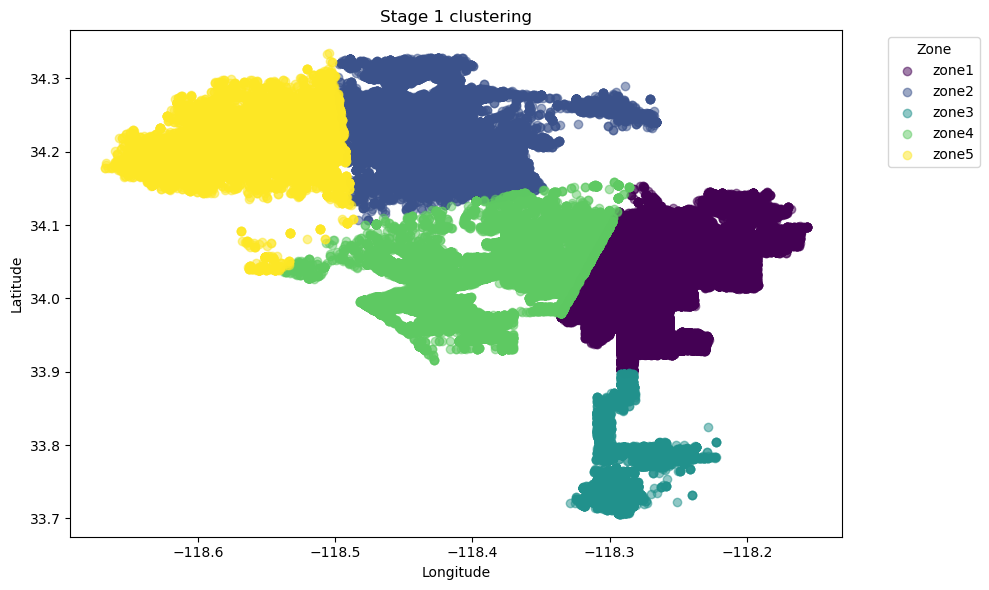

In [20]:
from sklearn.cluster import KMeans
import numpy as np

X = df_violent[['LAT', 'LON']]

kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

df_violent['Cluster'] = kmeans.labels_

zone_mapping = {0: 'zone1', 1: 'zone2', 2: 'zone3', 3: 'zone4', 4: 'zone5'}

df_violent['Zone'] = df_violent['Cluster'].map(zone_mapping)

plt.figure(figsize=(10, 6))

colors = plt.cm.viridis(np.linspace(0, 1, len(zone_mapping)))

for cluster_number, color in zip(zone_mapping.keys(), colors):

    cluster_data = df_violent[df_violent['Cluster'] == cluster_number]
    
    plt.scatter(cluster_data['LON'], cluster_data['LAT'], c=[color], label=zone_mapping[cluster_number], alpha=0.5)

plt.title('Stage 1 clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.legend(title='Zone', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

plt.show()

In [21]:
df_violent['Zone'].value_counts()

zone1    139165
zone4     52252
zone2     41595
zone5     25078
zone3     12430
Name: Zone, dtype: int64

# Stage 2 Clustering


## Zone 1

In [22]:
df_zone1 = df_violent[df_violent['Zone'] == 'zone1']

In [23]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_zone1[['LAT', 'LON']])

kmeans = KMeans(n_clusters=20, random_state=42)
kmeans_clusters = kmeans.fit_predict(scaled_features)

df_zone1['Cluster_KMeans'] = kmeans_clusters

print(df_zone1['Cluster_KMeans'].value_counts())

C:\Users\gnane\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


6     15701
5     11904
4      9914
18     9733
16     8849
15     8306
3      7832
14     7345
2      7260
1      6901
8      6755
13     6628
9      6190
10     5995
12     5402
11     3908
7      3313
19     2692
17     2316
0      2221
Name: Cluster_KMeans, dtype: int64


C:\Users\gnane\AppData\Local\Temp\ipykernel_30396\1369014136.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zone1['Cluster_KMeans'] = kmeans_clusters


### Zone 1 Subclustering

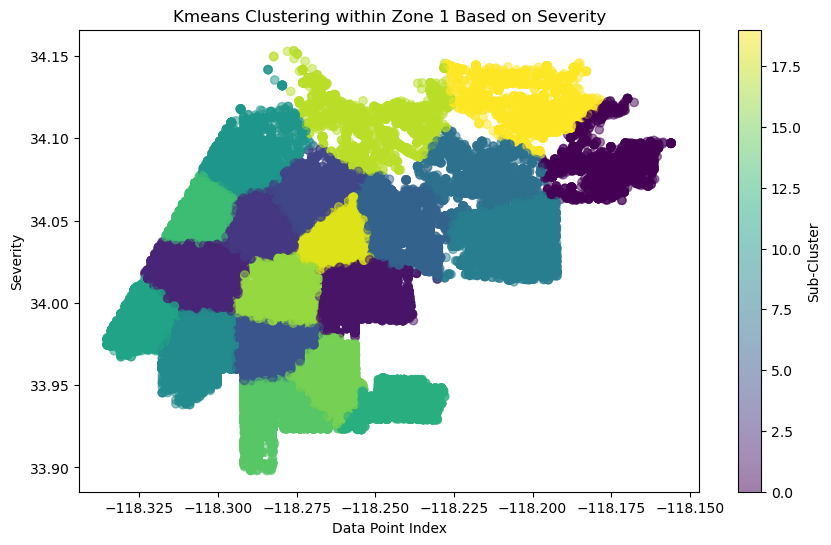

In [24]:
plt.figure(figsize=(10, 6))

plt.scatter(df_zone1['LON'], df_zone1['LAT'], c=df_zone1['Cluster_KMeans'], cmap='viridis', alpha=0.5)

plt.colorbar(label='Sub-Cluster')
plt.title('Kmeans Clustering within Zone 1 Based on Severity')
plt.xlabel('Data Point Index')
plt.ylabel('Severity')

plt.show()

In [25]:
cluster_severity_avg = df_zone1.groupby('Cluster_KMeans')['Severity'].mean().reset_index()
cluster_severity_avg.columns = ['Cluster_KMeans', 'Average_Severity']

df_zone1 = pd.merge(df_zone1, cluster_severity_avg, on='Cluster_KMeans', how='left')


In [26]:
cluster_severity = df_zone1[['Cluster_KMeans', 'Average_Severity']]

cluster_severity = cluster_severity.drop_duplicates().reset_index(drop=True)

print(cluster_severity_avg)

    Cluster_KMeans  Average_Severity
0                0          7.723953
1                1          7.726228
2                2          7.660165
3                3          7.579303
4                4          7.593998
5                5          7.713567
6                6          7.505624
7                7          7.699517
8                8          7.692021
9                9          7.778271
10              10          7.534729
11              11          7.763920
12              12          7.754406
13              13          7.570338
14              14          7.735834
15              15          7.764339
16              16          7.672890
17              17          7.631693
18              18          7.558317
19              19          7.611701


Initially, we relied on Severity score to locate the crime severity hot spots, but as the above tables shows we werent able to distinguish the difference in severity between the regions. To proceed further we decided to go with number of crimes in that region as a factor to determine the hot spots.

### Zone 1 Normalization(based on count as severity score is similar)


X'= X-X(min)/X(max)-X(min)

In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

cluster_info_1 = df_zone1.groupby('Cluster_KMeans').agg({
    'LAT': 'mean',
    'LON': 'mean',
    'Zone': 'count'
}).reset_index()

scaler = MinMaxScaler(feature_range=(0, 1))
cluster_info_1['Crime_Count_Normalized'] = scaler.fit_transform(cluster_info_1[['Zone']])

cluster_info_1


,Cluster_KMeans,LAT,LON,Zone,Crime_Count_Normalized
0,0,34.085188,-118.177635,2221,0.000000
1,1,34.005136,-118.255151,6901,0.347181
2,2,34.015497,-118.305078,7260,0.373813
3,3,34.050045,-118.286840,7832,0.416246
4,4,34.061609,-118.271795,9914,0.570697
5,5,33.972519,-118.283188,11904,0.718323
6,6,34.047697,-118.244798,15701,1.000000
7,7,34.078249,-118.215674,3313,0.081009
8,8,34.039526,-118.208183,6755,0.336350
9,9,33.973072,-118.305662,6190,0.294436


### Zone 1 outlines

In [28]:
import geopandas as gpd
from shapely.geometry import Polygon, Point, MultiPolygon
from scipy.spatial import Voronoi
import numpy as np
import folium
import geopandas as gpd
from folium.plugins import HeatMap

points_1 = cluster_info_1[['LON', 'LAT']].values
vor_1 = Voronoi(points_1)

x_min_1, y_min_1, x_max_1, y_max_1 = df_zone1['LON'].min(), df_zone1['LAT'].min(), df_zone1['LON'].max(), df_zone1['LAT'].max()
bounding_box_1 = Polygon([(x_min_1, y_min_1), (x_max_1, y_min_1), (x_max_1, y_max_1), (x_min_1, y_max_1)])

polygons_1 = [Polygon(vor_1.vertices[region]) for region in vor_1.regions if not -1 in region and len(region) > 0]
gpd_polygons_1 = gpd.GeoSeries(polygons_1)
gpd_polygons_1 = gpd_polygons_1[gpd_polygons_1.intersects(bounding_box_1)]
clipped_polygons_1 = gpd_polygons_1.intersection(bounding_box_1)

geojson_1 = clipped_polygons_1.to_json()

### Zone 1 Map based on Crime count normalization

In [31]:

def get_color(normalized_value):
    
    red = int(normalized_value * 255)
    green = 255 - red
    return f'#{red:02x}{green:02x}00'

la_map = folium.Map(location=[df_zone1['LAT'].mean(), df_zone1['LON'].mean()], zoom_start=12)

folium.GeoJson(geojson_1).add_to(la_map)

for idx, row in cluster_info_1.iterrows():
   
    color = get_color(row['Crime_Count_Normalized'])

    folium.CircleMarker(
        location=(row['LAT'], row['LON']),
        radius=5,
        color=color,
        fill=True,
        fill_color=color
    ).add_to(la_map)
    
la_map.save('C:\\Users\\reddy\\Desktop\\606\\Project\\Map\\la_crime_heatmap_1.html')
la_map


## Zone 2

In [32]:
df_zone2 = df_violent[df_violent['Zone'] == 'zone2']

In [33]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_zone2[['LAT', 'LON']])

kmeans = KMeans(n_clusters=20, random_state=42)
kmeans_clusters = kmeans.fit_predict(scaled_features)

df_zone2['Cluster_KMeans'] = kmeans_clusters

print(df_zone2['Cluster_KMeans'].value_counts())

C:\Users\gnane\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


12    3899
1     3819
5     3439
2     3125
10    2953
14    2818
7     2364
0     1940
18    1811
17    1676
13    1542
8     1506
6     1502
9     1488
16    1469
11    1450
4     1445
19    1266
3     1229
15     854
Name: Cluster_KMeans, dtype: int64


C:\Users\gnane\AppData\Local\Temp\ipykernel_30396\2161551357.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zone2['Cluster_KMeans'] = kmeans_clusters


### Zone 2 Subclustering

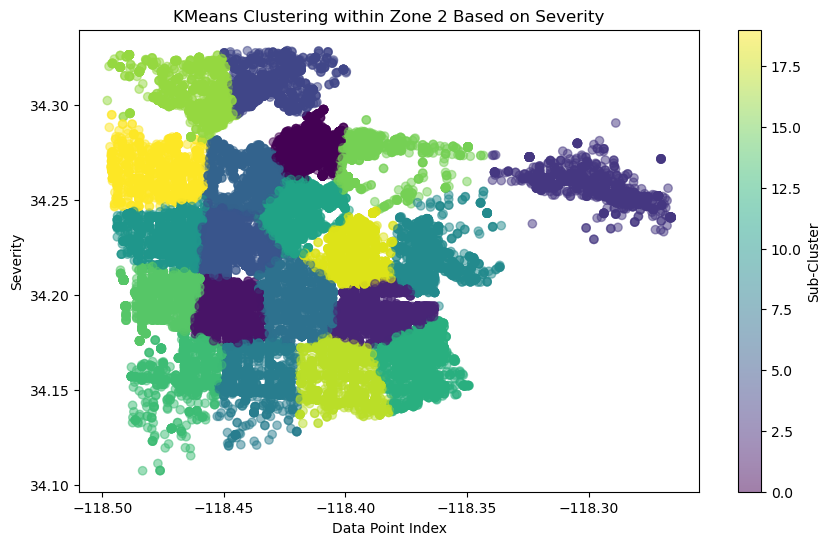

In [34]:
plt.figure(figsize=(10, 6))

plt.scatter(df_zone2['LON'], df_zone2['LAT'], c=df_zone2['Cluster_KMeans'], cmap='viridis', alpha=0.5)

plt.colorbar(label='Sub-Cluster')
plt.title('KMeans Clustering within Zone 2 Based on Severity')
plt.xlabel('Data Point Index')
plt.ylabel('Severity')

plt.show()

In [35]:
import pandas as pd

cluster_severity_avg_2 = df_zone2.groupby('Cluster_KMeans')['Severity'].mean().reset_index()
cluster_severity_avg_2.columns = ['Cluster_KMeans', 'Average_Severity']

df_zone2 = pd.merge(df_zone2, cluster_severity_avg_2, on='Cluster_KMeans', how='left')


In [36]:
cluster_severity_2 = df_zone2[['Cluster_KMeans', 'Average_Severity']]

cluster_severity_2 = cluster_severity_2.drop_duplicates().reset_index(drop=True)

print(cluster_severity_avg_2)

    Cluster_KMeans  Average_Severity
0                0          7.681753
1                1          7.562372
2                2          7.587392
3                3          7.551912
4                4          7.727128
5                5          7.668130
6                6          7.642743
7                7          7.655288
8                8          7.532537
9                9          7.620901
10              10          7.652015
11              11          7.617586
12              12          7.521211
13              13          7.470233
14              14          7.516182
15              15          7.641452
16              16          7.614023
17              17          7.488604
18              18          7.645886
19              19          7.595340


### Zone 2 Normalization(based on count as severity score is similar)

In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

cluster_info_2 = df_zone2.groupby('Cluster_KMeans').agg({
    'LAT': 'mean',
    'LON': 'mean',
    'Zone': 'count'
}).reset_index()

scaler_2 = MinMaxScaler(feature_range=(0, 1))
cluster_info_2['Crime_Count_Normalized'] = scaler_2.fit_transform(cluster_info_2[['Zone']])

cluster_info_2


,Cluster_KMeans,LAT,LON,Zone,Crime_Count_Normalized
0,0,34.275197,-118.414902,1940,0.356650
1,1,34.191742,-118.448349,3819,0.973727
2,2,34.190674,-118.386754,3125,0.745813
3,3,34.257245,-118.298829,1229,0.123153
4,4,34.311051,-118.431668,1445,0.194089
5,5,34.227138,-118.449482,3439,0.848933
6,6,34.261650,-118.439070,1502,0.212808
7,7,34.196699,-118.420599,2364,0.495895
8,8,34.157221,-118.437999,1506,0.214122
9,9,34.219093,-118.366499,1488,0.208210


### Zone 2 outlines

In [38]:
points_2 = cluster_info_2[['LON', 'LAT']].values
vor_2 = Voronoi(points_2)

x_min_2, y_min_2, x_max_2, y_max_2 = df_zone2['LON'].min(), df_zone2['LAT'].min(), df_zone2['LON'].max(), df_zone2['LAT'].max()
bounding_box_2 = Polygon([(x_min_2, y_min_2), (x_max_2, y_min_2), (x_max_2, y_max_2), (x_min_2, y_max_2)])

polygons_2 = [Polygon(vor_2.vertices[region]) for region in vor_2.regions if not -1 in region and len(region) > 0]
gpd_polygons_2 = gpd.GeoSeries(polygons_2)
gpd_polygons_2 = gpd_polygons_2[gpd_polygons_2.intersects(bounding_box_2)]
clipped_polygons_2 = gpd_polygons_2.intersection(bounding_box_2)

geojson_2 = clipped_polygons_2.to_json()

### Zone 2 Map based on Crime count normalization

In [39]:

def get_color(normalized_value):
    
    red = int(normalized_value * 255)
    green = 255 - red
    return f'#{red:02x}{green:02x}00'

la_map_2 = folium.Map(location=[df_zone2['LAT'].mean(), df_zone2['LON'].mean()], zoom_start=12)

folium.GeoJson(geojson_2).add_to(la_map_2)

for idx, row in cluster_info_2.iterrows():
   
    color = get_color(row['Crime_Count_Normalized'])

    folium.CircleMarker(
        location=(row['LAT'], row['LON']),
        radius=5,
        color=color,
        fill=True, 
        fill_color=color
    ).add_to(la_map_2)
    
la_map_2.save('C:\\Users\\reddy\\Desktop\\606\\Project\\Map\\la_crime_heatmap_2.html')
la_map_2


## Zone 3

In [40]:
df_zone3 = df_violent[df_violent['Zone'] == 'zone3']

In [41]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_zone3[['LAT', 'LON']])

kmeans = KMeans(n_clusters=20, random_state=42)
kmeans_clusters = kmeans.fit_predict(scaled_features)

df_zone3['Cluster_KMeans'] = kmeans_clusters

print(df_zone3['Cluster_KMeans'].value_counts())

C:\Users\gnane\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


6     1312
1     1249
3     1027
8      966
18     881
7      725
17     671
14     615
9      601
2      543
11     526
19     523
4      491
15     479
5      464
0      385
12     373
16     213
13     205
10     181
Name: Cluster_KMeans, dtype: int64


C:\Users\gnane\AppData\Local\Temp\ipykernel_30396\2376596302.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zone3['Cluster_KMeans'] = kmeans_clusters


### Zone 3 Subclustering

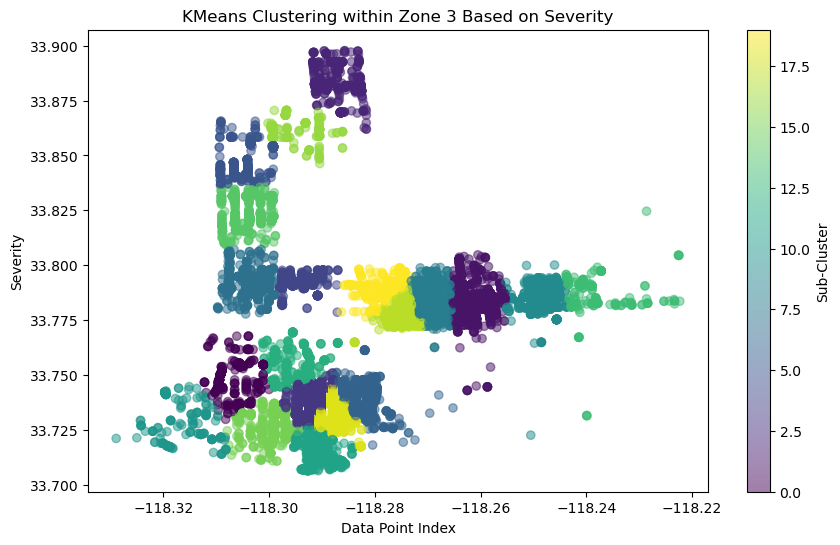

In [42]:
plt.figure(figsize=(10, 6))

plt.scatter(df_zone3['LON'], df_zone3['LAT'], c=df_zone3['Cluster_KMeans'], cmap='viridis', alpha=0.5)

plt.colorbar(label='Sub-Cluster')
plt.title('KMeans Clustering within Zone 3 Based on Severity')
plt.xlabel('Data Point Index')
plt.ylabel('Severity')

plt.show()

In [43]:
cluster_severity_avg_3 = df_zone3.groupby('Cluster_KMeans')['Severity'].mean().reset_index()
cluster_severity_avg_3.columns = ['Cluster_KMeans', 'Average_Severity']

df_zone3 = pd.merge(df_zone3, cluster_severity_avg_3, on='Cluster_KMeans', how='left')

cluster_severity_3 = df_zone3[['Cluster_KMeans', 'Average_Severity']]

cluster_severity_3 = cluster_severity_3.drop_duplicates().reset_index(drop=True)

print(cluster_severity_avg_3)

    Cluster_KMeans  Average_Severity
0                0          7.635065
1                1          7.622578
2                2          7.690239
3                3          7.625511
4                4          7.724440
5                5          7.731897
6                6          7.684375
7                7          7.611310
8                8          7.702277
9                9          7.729950
10              10          7.664641
11              11          7.672814
12              12          7.580429
13              13          7.651707
14              14          7.717561
15              15          7.670981
16              16          7.615493
17              17          7.726379
18              18          7.660386
19              19          7.768834


### Zone 3 Normalization(based on count as severity score is similar)

In [44]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

cluster_info_3 = df_zone3.groupby('Cluster_KMeans').agg({
    'LAT': 'mean',
    'LON': 'mean',
    'Zone': 'count'
}).reset_index()

scaler_3 = MinMaxScaler(feature_range=(0, 1))
cluster_info_3['Crime_Count_Normalized'] = scaler_3.fit_transform(cluster_info_3[['Zone']])

cluster_info_3


,Cluster_KMeans,LAT,LON,Zone,Crime_Count_Normalized
0,0,33.748516,-118.306491,385,0.180371
1,1,33.782861,-118.261823,1249,0.944297
2,2,33.883711,-118.287599,543,0.320071
3,3,33.737968,-118.292447,1027,0.748011
4,4,33.792397,-118.293345,491,0.274094
5,5,33.847910,-118.304219,464,0.250221
6,6,33.739663,-118.282374,1312,1.000000
7,7,33.791990,-118.303741,725,0.480990
8,8,33.783056,-118.268917,966,0.694076
9,9,33.784426,-118.248623,601,0.371353


### Zone 3 outlines

In [45]:
points_3 = cluster_info_3[['LON', 'LAT']].values
vor_3 = Voronoi(points_3)

x_min_3, y_min_3, x_max_3, y_max_3 = df_zone3['LON'].min(), df_zone3['LAT'].min(), df_zone3['LON'].max(), df_zone3['LAT'].max()
bounding_box_3 = Polygon([(x_min_3, y_min_3), (x_max_3, y_min_3), (x_max_3, y_max_3), (x_min_3, y_max_3)])

polygons_3 = [Polygon(vor_3.vertices[region]) for region in vor_3.regions if not -1 in region and len(region) > 0]
gpd_polygons_3 = gpd.GeoSeries(polygons_3)
gpd_polygons_3 = gpd_polygons_3[gpd_polygons_3.intersects(bounding_box_3)]
clipped_polygons_3 = gpd_polygons_3.intersection(bounding_box_3)

geojson_3 = clipped_polygons_3.to_json()

### Zone 3 Map based on Crime count normalization

In [46]:

def get_color(normalized_value):
    
    red = int(normalized_value * 255)
    green = 255 - red
    return f'#{red:02x}{green:02x}00'

la_map_3 = folium.Map(location=[df_zone3['LAT'].mean(), df_zone3['LON'].mean()], zoom_start=12)

folium.GeoJson(geojson_3).add_to(la_map_3)

for idx, row in cluster_info_3.iterrows():
   
    color = get_color(row['Crime_Count_Normalized'])

    folium.CircleMarker(
        location=(row['LAT'], row['LON']),
        radius=5,
        color=color,
        fill=True, 
        fill_color=color
    ).add_to(la_map_3)
    
la_map_3.save('C:\\Users\\gnane\\OneDrive\\Desktop\\la_crime_heatmap_3.html')
la_map_3


## Zone 4

In [47]:
df_zone4 = df_violent[df_violent['Zone'] == 'zone4']

In [48]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_zone4[['LAT', 'LON']])

kmeans = KMeans(n_clusters=20, random_state=42)
kmeans_clusters = kmeans.fit_predict(scaled_features)

df_zone4['Cluster_KMeans'] = kmeans_clusters

print(df_zone4['Cluster_KMeans'].value_counts())

C:\Users\gnane\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


18    6702
4     4362
10    4019
7     3773
6     3753
5     3489
15    2944
0     2866
3     2662
2     2646
16    2492
11    2089
14    2062
17    1872
8     1851
9     1830
12    1038
1      845
19     694
13     263
Name: Cluster_KMeans, dtype: int64


C:\Users\gnane\AppData\Local\Temp\ipykernel_30396\186510880.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zone4['Cluster_KMeans'] = kmeans_clusters


### Zone 4 Subclustering

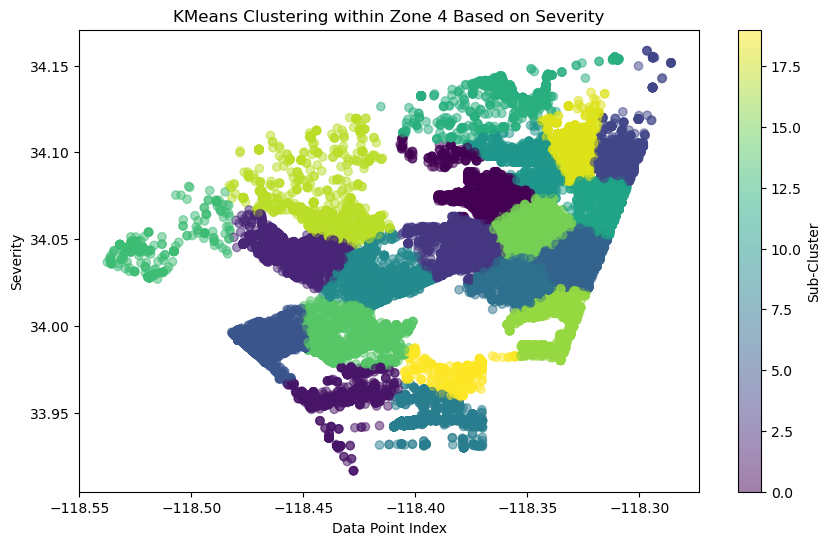

In [49]:
plt.figure(figsize=(10, 6))

plt.scatter(df_zone4['LON'], df_zone4['LAT'], c=df_zone4['Cluster_KMeans'], cmap='viridis', alpha=0.5)

plt.colorbar(label='Sub-Cluster')
plt.title('KMeans Clustering within Zone 4 Based on Severity')
plt.xlabel('Data Point Index')
plt.ylabel('Severity')

plt.show()

In [50]:
import pandas as pd

cluster_severity_avg_4 = df_zone4.groupby('Cluster_KMeans')['Severity'].mean().reset_index()
cluster_severity_avg_4.columns = ['Cluster_KMeans', 'Average_Severity']

df_zone4 = pd.merge(df_zone4, cluster_severity_avg_4, on='Cluster_KMeans', how='left')

cluster_severity_4 = df_zone4[['Cluster_KMeans', 'Average_Severity']]

cluster_severity_4 = cluster_severity_4.drop_duplicates().reset_index(drop=True)

print(cluster_severity_avg_4)

    Cluster_KMeans  Average_Severity
0                0          7.489044
1                1          7.546036
2                2          7.402759
3                3          7.520811
4                4          7.511050
5                5          7.448037
6                6          7.642819
7                7          7.680360
8                8          7.325014
9                9          7.503770
10              10          7.503931
11              11          7.573289
12              12          7.523410
13              13          7.479087
14              14          7.538894
15              15          7.535904
16              16          7.704615
17              17          7.450160
18              18          7.489570
19              19          7.627954


### Zone 4 Normalization(based on count as severity score is similar)

In [51]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

cluster_info_4 = df_zone4.groupby('Cluster_KMeans').agg({
    'LAT': 'mean',
    'LON': 'mean',
    'Zone': 'count'
}).reset_index()

scaler_4 = MinMaxScaler(feature_range=(0, 1))
cluster_info_4['Crime_Count_Normalized'] = scaler_4.fit_transform(cluster_info_4[['Zone']])

cluster_info_4


,Cluster_KMeans,LAT,LON,Zone,Crime_Count_Normalized
0,0,34.076647,-118.367682,2866,0.404255
1,1,33.959460,-118.429289,845,0.090387
2,2,34.042425,-118.451589,2646,0.370089
3,3,34.045392,-118.379700,2662,0.372573
4,4,34.097249,-118.309672,4362,0.636590
5,5,33.991143,-118.469194,3489,0.501009
6,6,34.038283,-118.329648,3753,0.542010
7,7,34.023759,-118.353984,3773,0.545116
8,8,33.947565,-118.393299,1851,0.246622
9,9,34.026523,-118.414201,1830,0.243361


### Zone 4 outlines

In [52]:
points_4 = cluster_info_4[['LON', 'LAT']].values
vor_4 = Voronoi(points_4)

x_min_4, y_min_4, x_max_4, y_max_4 = df_zone4['LON'].min(), df_zone4['LAT'].min(), df_zone4['LON'].max(), df_zone4['LAT'].max()
bounding_box_4 = Polygon([(x_min_4, y_min_4), (x_max_4, y_min_4), (x_max_4, y_max_4), (x_min_4, y_max_4)])

polygons_4 = [Polygon(vor_4.vertices[region]) for region in vor_4.regions if not -1 in region and len(region) > 0]
gpd_polygons_4 = gpd.GeoSeries(polygons_4)
gpd_polygons_4 = gpd_polygons_4[gpd_polygons_4.intersects(bounding_box_4)]
clipped_polygons_4 = gpd_polygons_4.intersection(bounding_box_4)

geojson_4 = clipped_polygons_4.to_json()


### Zone 4 Map based on Crime count normalization

In [53]:

def get_color(normalized_value):
    
    red = int(normalized_value * 255)
    green = 255 - red
    return f'#{red:02x}{green:02x}00'

la_map_4 = folium.Map(location=[df_zone4['LAT'].mean(), df_zone4['LON'].mean()], zoom_start=12)

folium.GeoJson(geojson_4).add_to(la_map_4)

for idx, row in cluster_info_4.iterrows():
   
    color = get_color(row['Crime_Count_Normalized'])

    folium.CircleMarker(
        location=(row['LAT'], row['LON']),
        radius=5,
        color=color,
        fill=True, 
        fill_color=color
    ).add_to(la_map_4)
    
la_map_4.save('C:\\Users\\gnane\\OneDrive\\Desktop\\la_crime_heatmap_4.html')
la_map_4


## Zone 5

In [54]:
df_zone5 = df_violent[df_violent['Zone'] == 'zone5']

In [55]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_zone5[['LAT', 'LON']])

kmeans = KMeans(n_clusters=20, random_state=42)
kmeans_clusters = kmeans.fit_predict(scaled_features)

df_zone5['Cluster_KMeans'] = kmeans_clusters

print(df_zone5['Cluster_KMeans'].value_counts())

C:\Users\gnane\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


9     2074
1     2040
18    1945
5     1836
2     1721
19    1681
14    1513
12    1447
10    1364
8     1281
4     1111
11    1088
17    1026
16    1014
7      859
3      828
15     818
0      759
13     457
6      216
Name: Cluster_KMeans, dtype: int64


C:\Users\gnane\AppData\Local\Temp\ipykernel_30396\2474668466.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zone5['Cluster_KMeans'] = kmeans_clusters


### Zone 5 Subclustering

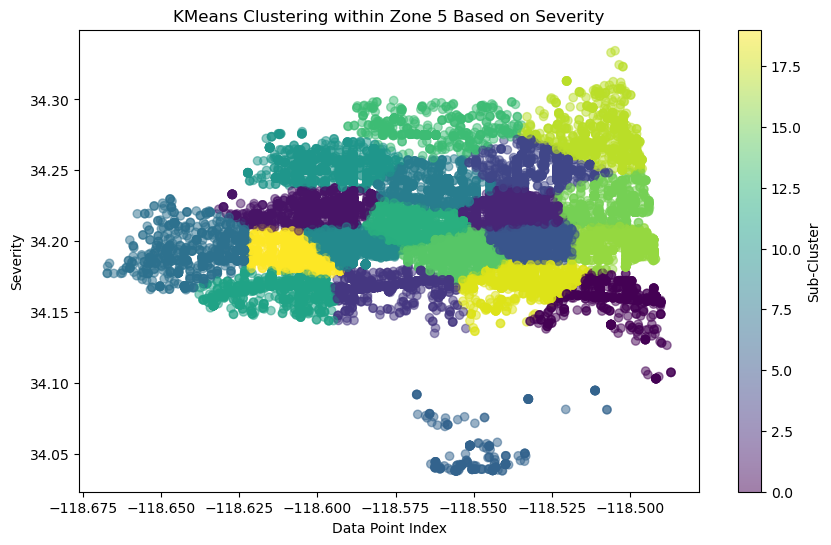

In [56]:
plt.figure(figsize=(10, 6))

plt.scatter(df_zone5['LON'], df_zone5['LAT'], c=df_zone5['Cluster_KMeans'], cmap='viridis', alpha=0.5)

plt.colorbar(label='Sub-Cluster')
plt.title('KMeans Clustering within Zone 5 Based on Severity')
plt.xlabel('Data Point Index')
plt.ylabel('Severity')

plt.show()

In [57]:
cluster_severity_avg_5 = df_zone5.groupby('Cluster_KMeans')['Severity'].mean().reset_index()
cluster_severity_avg_5.columns = ['Cluster_KMeans', 'Average_Severity']

df_zone5 = pd.merge(df_zone5, cluster_severity_avg_5, on='Cluster_KMeans', how='left')

cluster_severity_5 = df_zone5[['Cluster_KMeans', 'Average_Severity']]

cluster_severity_5 = cluster_severity_5.drop_duplicates().reset_index(drop=True)

print(cluster_severity_avg_5)

    Cluster_KMeans  Average_Severity
0                0          7.529381
1                1          7.600441
2                2          7.622777
3                3          7.530072
4                4          7.562646
5                5          7.595153
6                6          7.394444
7                7          7.530617
8                8          7.598595
9                9          7.549662
10              10          7.521481
11              11          7.563787
12              12          7.613476
13              13          7.497155
14              14          7.560806
15              15          7.616137
16              16          7.563807
17              17          7.527680
18              18          7.530591
19              19          7.526234


### Zone 5 Normalization(based on count as severity score is similar)

In [58]:

cluster_info_5 = df_zone5.groupby('Cluster_KMeans').agg({
    'LAT': 'mean',
    'LON': 'mean',
    'Zone': 'count'
}).reset_index()

scaler_5 = MinMaxScaler(feature_range=(0, 1))
cluster_info_5['Crime_Count_Normalized'] = scaler_5.fit_transform(cluster_info_5[['Zone']])

cluster_info_5


,Cluster_KMeans,LAT,LON,Zone,Crime_Count_Normalized
0,0,34.160220,-118.506408,759,0.292250
1,1,34.222614,-118.598840,2040,0.981701
2,2,34.222136,-118.537531,1721,0.810011
3,3,34.167144,-118.577697,828,0.329386
4,4,34.250786,-118.530729,1111,0.481701
5,5,34.198657,-118.532297,1836,0.871905
6,6,34.051931,-118.548591,216,0.000000
7,7,34.192115,-118.637042,859,0.346071
8,8,34.237140,-118.560757,1281,0.573197
9,9,34.197020,-118.591566,2074,1.000000


### Zone 5 outlines

In [59]:
points_5 = cluster_info_5[['LON', 'LAT']].values
vor_5 = Voronoi(points_5)

x_min_5, y_min_5, x_max_5, y_max_5 = df_zone5['LON'].min(), df_zone5['LAT'].min(), df_zone5['LON'].max(), df_zone5['LAT'].max()
bounding_box_5 = Polygon([(x_min_5, y_min_5), (x_max_5, y_min_5), (x_max_5, y_max_5), (x_min_5, y_max_5)])

polygons_5 = [Polygon(vor_5.vertices[region]) for region in vor_5.regions if not -1 in region and len(region) > 0]
gpd_polygons_5 = gpd.GeoSeries(polygons_5)
gpd_polygons_5 = gpd_polygons_5[gpd_polygons_5.intersects(bounding_box_5)]
clipped_polygons_5 = gpd_polygons_5.intersection(bounding_box_5)

geojson_5 = clipped_polygons_5.to_json()

### Zone 5 Map based on Crime count normalization

In [61]:

def get_color(normalized_value):
    
    red = int(normalized_value * 255)
    green = 255 - red
    return f'#{red:02x}{green:02x}00'

la_map_5 = folium.Map(location=[df_zone5['LAT'].mean(), df_zone5['LON'].mean()], zoom_start=12)

folium.GeoJson(geojson_5).add_to(la_map_5)

for idx, row in cluster_info_5.iterrows():
   
    color = get_color(row['Crime_Count_Normalized'])

    folium.CircleMarker(
        location=(row['LAT'], row['LON']),
        radius=5,
        color=color,
        fill=True, 
        fill_color=color
    ).add_to(la_map_5)
    
la_map_5.save('C:\\Users\\gnane\\OneDrive\\Desktop\\la_crime_heatmap_5.html')
la_map_5


## Final LA Map

In [62]:
heatmap_data= cluster_info_1[['LAT', 'LON', 'Crime_Count_Normalized']].values.tolist()

heatmap_data_2= cluster_info_2[['LAT', 'LON', 'Crime_Count_Normalized']].values.tolist()

heatmap_data_3 = cluster_info_3[['LAT', 'LON', 'Crime_Count_Normalized']].values.tolist()

In [63]:
heatmap_data_4 = cluster_info_4[['LAT', 'LON', 'Crime_Count_Normalized']].values.tolist()

heatmap_data_5 = cluster_info_5[['LAT', 'LON', 'Crime_Count_Normalized']].values.tolist()

In [64]:

la_combined_map_final = folium.Map(location=[(df_zone1['LAT'].mean() + df_zone2['LAT'].mean() + df_zone3['LAT'].mean() + df_zone4['LAT'].mean()+ df_zone5['LAT'].mean()) / 5, 
                                       (df_zone1['LON'].mean() + df_zone2['LON'].mean() + df_zone3['LON'].mean() + df_zone4['LON'].mean()+ df_zone5['LON'].mean()) / 5], 
                             zoom_start=12)

def get_color(normalized_value):
    red = int(normalized_value * 255)
    green = 255 - red
    return f'#{red:02x}{green:02x}00'

folium.GeoJson(geojson_1).add_to(la_combined_map_final)
HeatMap(heatmap_data, min_opacity=0.6, max_zoom=1, radius=20, blur=15, gradient={0: 'green', 0.5: 'yellow', 1: 'red'}).add_to(la_combined_map_final)

for idx, row in cluster_info_1.iterrows():
    color = get_color(row['Crime_Count_Normalized'])
    folium.CircleMarker(location=(row['LAT'], row['LON']), radius=5, color=color, fill=True, fill_color=color).add_to(la_combined_map_final)

folium.GeoJson(geojson_2).add_to(la_combined_map_final)
HeatMap(heatmap_data_2, min_opacity=0.6, max_zoom=1, radius=20, blur=15, gradient={0: 'green', 0.5: 'yellow', 1: 'red'}).add_to(la_combined_map_final)

for idx, row in cluster_info_2.iterrows():

    color = get_color(row['Crime_Count_Normalized'])
    folium.CircleMarker(location=(row['LAT'], row['LON']), radius=5, color=color, fill=True, fill_color=color).add_to(la_combined_map_final)
    
folium.GeoJson(geojson_3).add_to(la_combined_map_final)
HeatMap(heatmap_data_3, min_opacity=0.6, max_zoom=1, radius=20, blur=15, gradient={0: 'green', 0.5: 'yellow', 1: 'red'}).add_to(la_combined_map_final)

for idx, row in cluster_info_3.iterrows():

    color = get_color(row['Crime_Count_Normalized'])
    folium.CircleMarker(location=(row['LAT'], row['LON']), radius=5, color=color, fill=True, fill_color=color).add_to(la_combined_map_final)
    
folium.GeoJson(geojson_4).add_to(la_combined_map_final)
HeatMap(heatmap_data_4, min_opacity=0.6, max_zoom=1, radius=20, blur=15, gradient={0: 'green', 0.5: 'yellow', 1: 'red'}).add_to(la_combined_map_final)

for idx, row in cluster_info_4.iterrows():

    color = get_color(row['Crime_Count_Normalized'])
    folium.CircleMarker(location=(row['LAT'], row['LON']), radius=5, color=color, fill=True, fill_color=color).add_to(la_combined_map_final)
    
folium.GeoJson(geojson_5).add_to(la_combined_map_final)
HeatMap(heatmap_data_5, min_opacity=0.6, max_zoom=1, radius=20, blur=15, gradient={0: 'green', 0.5: 'yellow', 1: 'red'}).add_to(la_combined_map_final)

for idx, row in cluster_info_5.iterrows():

    color = get_color(row['Crime_Count_Normalized'])
    folium.CircleMarker(location=(row['LAT'], row['LON']), radius=5, color=color, fill=True, fill_color=color).add_to(la_combined_map_final)    
    
la_combined_map_final.save('C:\\Users\\reddy\\Desktop\\606\\Project\\Map\\la_crime_final.html')
la_combined_map_final

We are able to discern the regions that are hotspots for crime and locations with a higher concentration of criminal activity from the presented heatmap. Determining severe zones and supporting law enforcement with targeted patrols and resource allocation are made possible by this visualization. It also helps urban planners create safer neighborhood areas by being a useful tool.